In [1]:
import sys
import os

%matplotlib inline
    
from smfret_analysis import print_info, Plotter

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print_info()

smFRET analysis software version 1.0
(git revision 1.0-22-g66e2f0c)
Output version 7
Using sdt-python version 13.1


In [4]:
p = Plotter(data_dir="data")

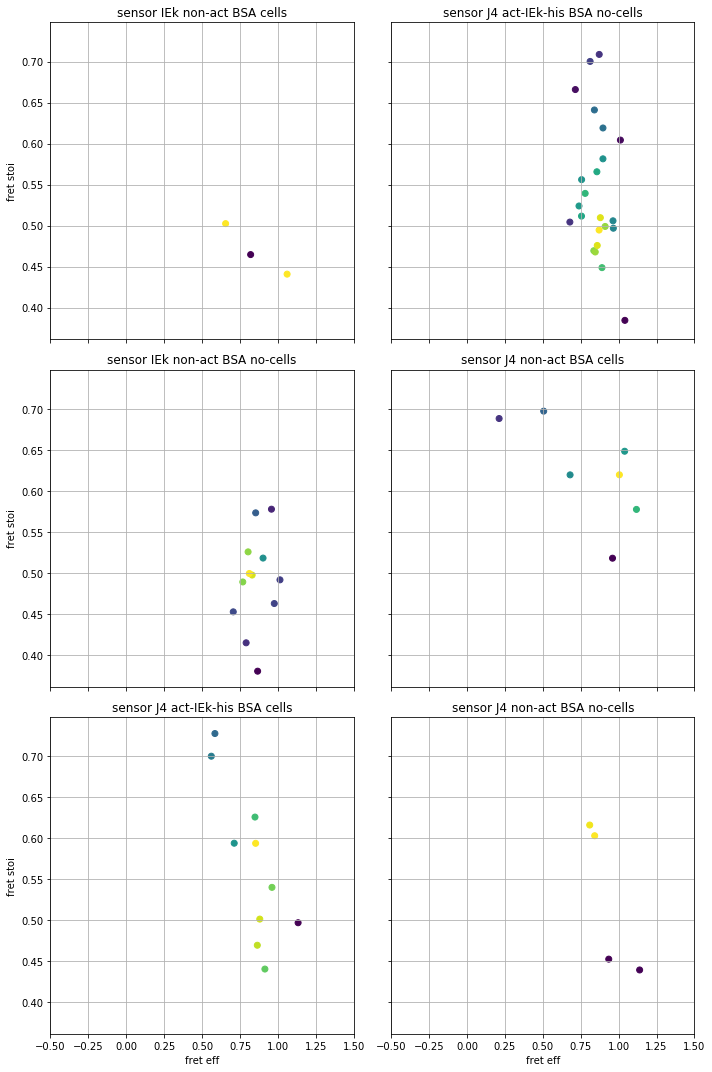

In [6]:
p.scatter(frame=2, xlim=(-0.5, 1.5));

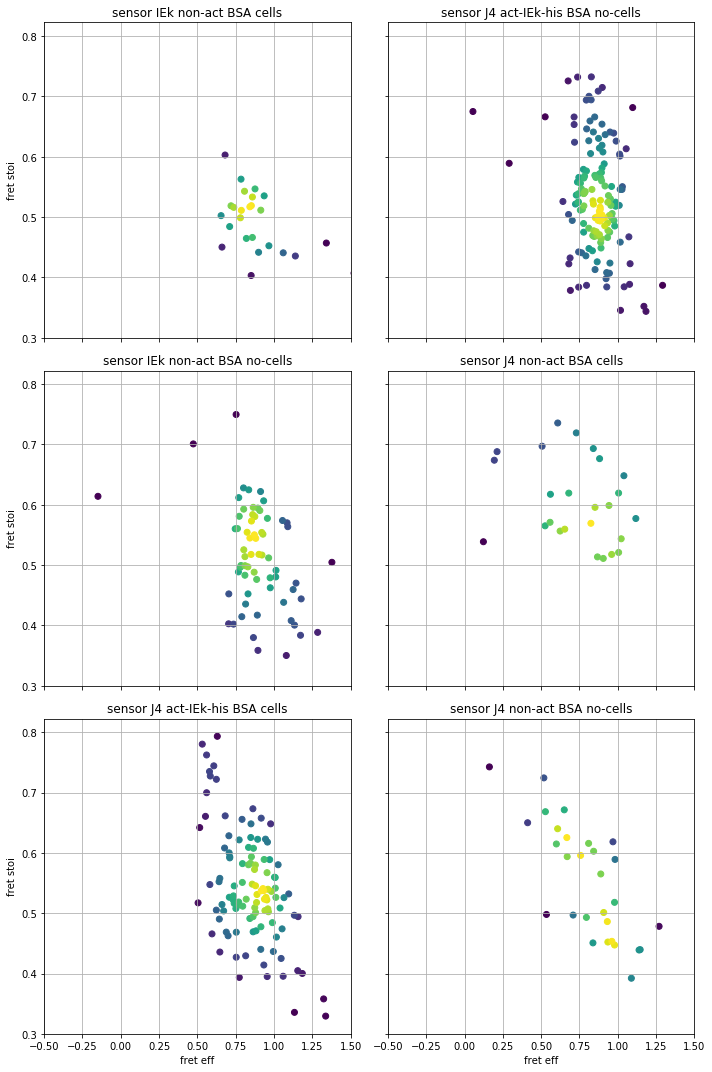

In [7]:
p.scatter(frame=None, xlim=(-0.5, 1.5));

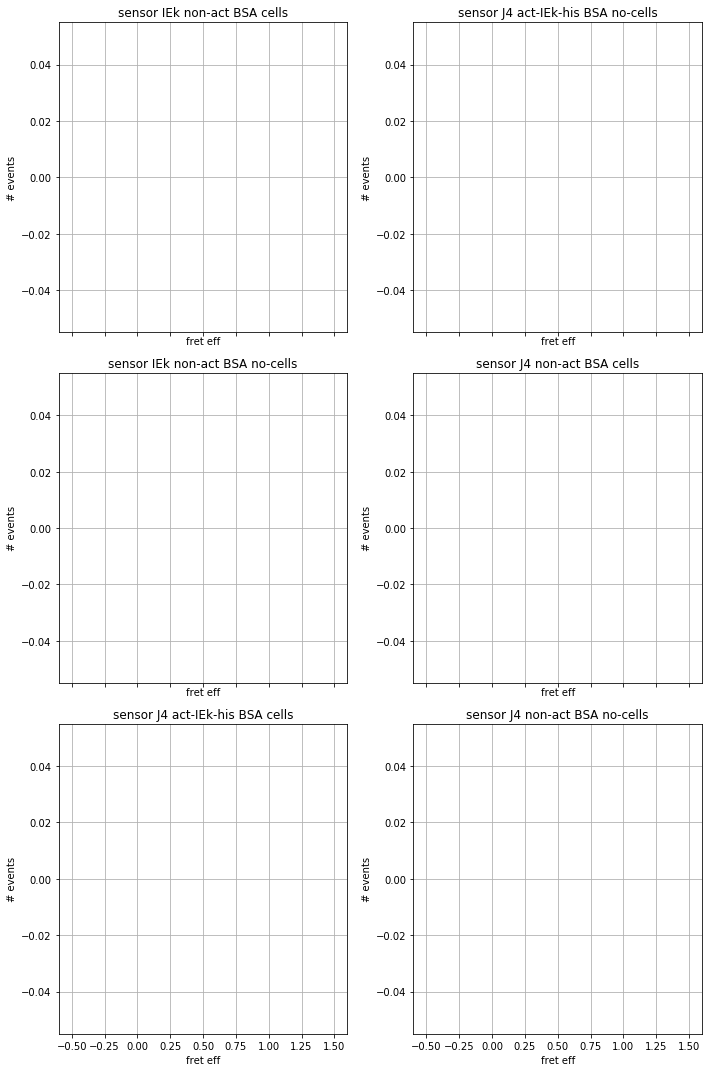

In [8]:
p.hist(frame=2);

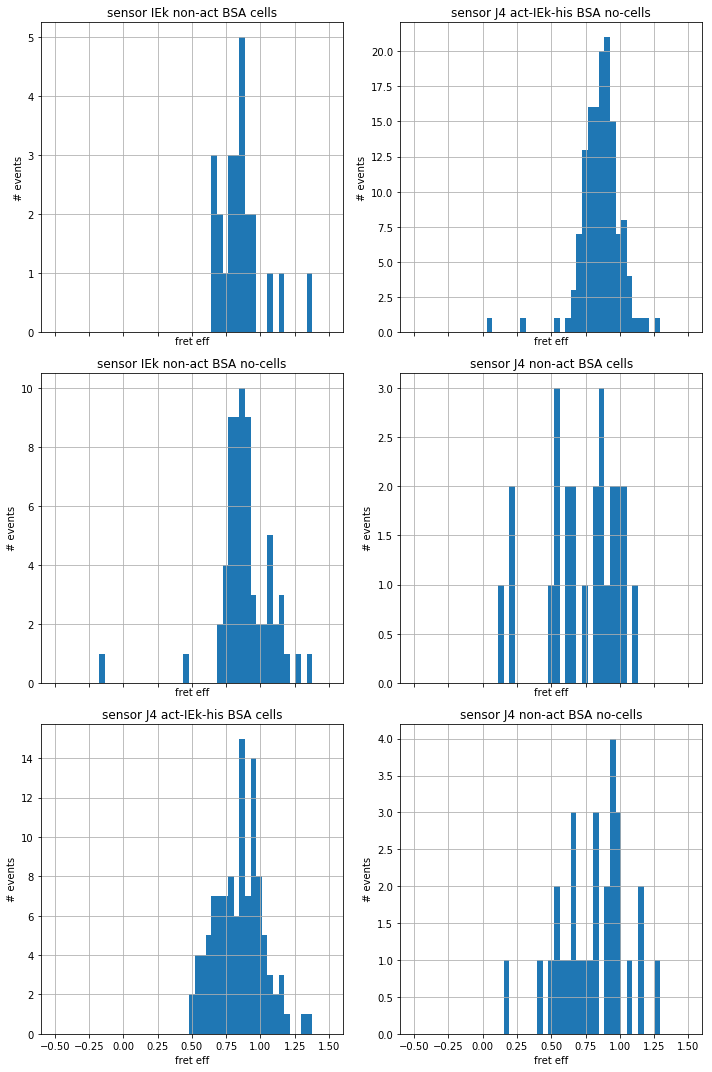

In [9]:
p.hist();